In [2]:
# import data yang akan digunakan
from google.colab import files
uploaded = files.upload()

Saving Data-Property-Indonesia-2021.xlsx to Data-Property-Indonesia-2021.xlsx


In [56]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr
%matplotlib inline

plt.style.use('bmh'); sns.set()

In [4]:
df = pd.read_excel('Data-Property-Indonesia-2021.xlsx', sheet_name=None)
df

{'Bali':              created_at  LT (M2)  LB (M2)  KT  KM  garasi  carport     lokasi  \
 0   2021-06-12 00:00:00      210      120   3   2     NaN      3.0  Denpasar    
 1   2021-06-12 00:00:00      300      280   3   2     1.0      1.0   Denpasar   
 2   2021-06-12 00:00:00      300      280   6   6     1.0      1.0   Denpasar   
 3   2021-06-12 00:00:00      304      180   3   2     1.0      1.0   Denpasar   
 4   2021-06-12 00:00:00      186      280   3   3     3.0      3.0   Denpasar   
 ..                  ...      ...      ...  ..  ..     ...      ...        ...   
 95  2021-07-12 00:00:00      560      175   5   6     1.0      1.0    Gianyar   
 96  2021-06-12 00:00:00     1095      800   6   5     1.0      NaN   Denpasar   
 97  2021-06-12 00:00:00      100       60   3   2     1.0      NaN     Badung   
 98  2021-06-12 00:00:00      125      100   3   1     1.0      NaN   Denpasar   
 99  2021-06-12 00:00:00      100      190   5   2     1.0      1.0   Denpasar   
 
    se

In [5]:
# memilih index semarang untuk menjadi acuan kolom pada wilayah lainnya 
df['Semarang'].columns 

Index(['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport',
       'Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL',
       'Deskripsi'],
      dtype='object')

In [6]:
# mengubah semua index kolom wilayah menjadi kolom index yang sudah ditentukan sebelumnya
df['Semarang'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Jakarta'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Bandung'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Bogor'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Lampung - Sumatera selatan'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Kalimantan (All)'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Depok'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Tangerang'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Bekasi'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Padang - Palembang'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Medan'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Surabaya'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Yogyakarta'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Bali'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']
df['Sulawesi(All)'].columns = ['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport','Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL','Deskripsi']

In [7]:
# menggabungkan semua wilayah data frame 
df2 = pd.concat(df, ignore_index=True)
df2

,Created_at,LT (m2),LB (m2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi
0,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2.dtypes

Created_at     object
LT (m2)        object
LB (m2)       float64
KT             object
KM             object
Garasi         object
Carport        object
Lokasi         object
Sertifikat     object
Listrik        object
Hadap          object
Harga          object
URL            object
Deskripsi      object
dtype: object

In [9]:
df2['Lokasi'] = df2['Lokasi'].astype('category')
df2['Sertifikat'] = df2['Sertifikat'].astype('category')
df2['Hadap'] = df2['Hadap'].astype('category')
df2['URL'] = df2['URL'].astype('category')
df2['Deskripsi'] = df2['Deskripsi'].astype('category')
df2.dtypes

Created_at      object
LT (m2)         object
LB (m2)        float64
KT              object
KM              object
Garasi          object
Carport         object
Lokasi        category
Sertifikat    category
Listrik         object
Hadap         category
Harga           object
URL           category
Deskripsi     category
dtype: object

In [10]:
df2['LT (m2)'] = pd.to_numeric(df2['LT (m2)'], errors='coerce')
df2['KT'] = pd.to_numeric(df2['KT'], errors='coerce')
df2['KM'] = pd.to_numeric(df2['KM'], errors='coerce')
df2['Garasi'] = pd.to_numeric(df2['Garasi'], errors='coerce')
df2['Carport'] = pd.to_numeric(df2['Carport'], errors='coerce')
df2['Listrik'] = pd.to_numeric(df2['Listrik'], errors='coerce')
df2['Harga'] = pd.to_numeric(df2['Harga'], errors='coerce')
df2.dtypes

Created_at      object
LT (m2)        float64
LB (m2)        float64
KT             float64
KM             float64
Garasi         float64
Carport        float64
Lokasi        category
Sertifikat    category
Listrik        float64
Hadap         category
Harga          float64
URL           category
Deskripsi     category
dtype: object

### Keterangan Data

Variables :
- LT (m2) : Luas Tanah 
- LB (m2) : Luas Bangunan
- KT : Kamar Tidur
- KM : Kamar Mandi
- Garasi
- Carport
- Lokasi
- Sertifikat
- Harga
- Deskripsi

In [11]:
df2.describe()

,LT (m2),LB (m2),KT,KM,Garasi,Carport,Listrik,Harga
count,1726.000000,1725.000000,1720.000000,1722.000000,682.000000,1214.000000,1430.000000,1.626000e+03
mean,196.358922,161.662609,3.447674,2.502904,1.161290,1.459638,2748.650350,2.903205e+09
std,264.880496,184.044191,3.143947,3.018102,1.325375,1.120712,3568.903709,3.753972e+10
min,7.000000,7.000000,1.000000,1.000000,0.000000,0.000000,220.000000,4.100000e+01
25%,80.000000,55.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,2.357500e+08
50%,119.000000,100.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,7.500000e+08
75%,200.000000,198.000000,4.000000,3.000000,1.000000,2.000000,2200.000000,1.827500e+09
max,3422.000000,2500.000000,109.000000,106.000000,13.000000,13.000000,66000.000000,1.500000e+12


In [12]:
# Cek type data dan missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Created_at  1728 non-null   object  
 1   LT (m2)     1726 non-null   float64 
 2   LB (m2)     1725 non-null   float64 
 3   KT          1720 non-null   float64 
 4   KM          1722 non-null   float64 
 5   Garasi      682 non-null    float64 
 6   Carport     1214 non-null   float64 
 7   Lokasi      1726 non-null   category
 8   Sertifikat  1718 non-null   category
 9   Listrik     1430 non-null   float64 
 10  Hadap       698 non-null    category
 11  Harga       1626 non-null   float64 
 12  URL         1726 non-null   category
 13  Deskripsi   1709 non-null   category
dtypes: category(5), float64(8), object(1)
memory usage: 304.5+ KB


In [13]:
#mengecek apakah ada duplikat data?
print(df2.shape)
df2.duplicated().sum()

(1749, 14)


20

In [14]:
#menghapus entri yang memiliki data duplikat 
df2.drop_duplicates(inplace=True)
print(df2.duplicated().sum()) # no more duplicates
print(df2.shape) # re-check by printing data size

0
(1729, 14)


In [15]:
#unutk menghilangkan NaN 
df2 = df2.dropna()
df2.dropna(inplace=True)

In [16]:
print(df2.isnull().sum())

Created_at    0
LT (m2)       0
LB (m2)       0
KT            0
KM            0
Garasi        0
Carport       0
Lokasi        0
Sertifikat    0
Listrik       0
Hadap         0
Harga         0
URL           0
Deskripsi     0
dtype: int64


In [17]:
print(df2.shape)
df2.head()

(167, 14)


,Created_at,LT (m2),LB (m2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi
0,2021-03-12 00:00:00,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
7,2021-06-12 00:00:00,97.0,72.0,3.0,2.0,0.0,1.0,Cibinong,SHM,2200.0,Selatan,1.230000e+09,https://www.rumah123.com/properti/bogor/hos920...,"Berada dalam kawasan Pemda, Hanya 5menit ke C..."
10,2021-06-12 00:00:00,312.0,70.0,4.0,2.0,1.0,1.0,Tanah Sareal,SHM,2200.0,Timur,2.500000e+08,https://www.rumah123.com/properti/bogor/hos892...,"Dekat lapangan Tenis dan mesjid, 10 menit pint..."
12,2021-06-12 00:00:00,112.0,129.0,3.0,3.0,0.0,0.0,Gunung Putri,SHGB,3500.0,Selatan,1.800000e+09,https://www.rumah123.com/properti/bogor/hos820...,Cluster Nashville ini dekat dengan beberapa fa...
13,2021-06-12 00:00:00,60.0,50.0,2.0,1.0,0.0,0.0,Babakan Madang,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bogor/hos922...,"0 KM dari exit toll Babakan Madang., 5 menit G..."


In [18]:
# Trimming : IQR
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # Menghitung jumlah data setelah di trim dengan IQR

LT (m2)    1.855000e+02
LB (m2)    2.400000e+02
KT         3.000000e+00
KM         3.000000e+00
Garasi     0.000000e+00
Carport    1.000000e+00
Listrik    2.200000e+03
Harga      2.607000e+09
dtype: float64


In [19]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [20]:
numeric_col = df2[['LB (m2)','LT (m2)','KT','KM','Garasi','Carport','Listrik','Harga']]

In [21]:
df3 = numeric_col[~((numeric_col<lower_limit)|(numeric_col>upper_limit)).any(axis=1)]
df3.shape # data setelah di cek outlier

(105, 8)

In [65]:
df3

,LB (m2),LT (m2),KT,KM,Garasi,Carport,Listrik,Harga
0,38.0,75.0,2.0,1.0,1.0,1.0,1300.0,6.925500e+08
10,70.0,312.0,4.0,2.0,1.0,1.0,2200.0,2.500000e+08
105,36.0,72.0,2.0,1.0,1.0,1.0,1300.0,4.000000e+08
110,45.0,62.0,2.0,1.0,1.0,1.0,1300.0,4.200000e+08
112,55.0,72.0,2.0,1.0,1.0,1.0,1300.0,2.950000e+08
...,...,...,...,...,...,...,...,...
1618,45.0,65.0,2.0,1.0,1.0,1.0,1300.0,4.900000e+08
1620,32.0,100.0,2.0,1.0,1.0,1.0,3500.0,9.570000e+08
1621,461.0,370.0,7.0,6.0,1.0,1.0,3500.0,3.000000e+09
1625,70.0,95.0,2.0,2.0,1.0,1.0,1300.0,9.900000e+08


In [23]:
df2.shape # data sebelum cek outlier

(167, 14)

In [24]:
#Pertama, buat variabel x dan y.
x = df2[['LB (m2)','LT (m2)','KT','KM','Garasi','Carport','Listrik']]
y = df2['Harga']
#Kedua, ucup split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Ketiga, ucup bikin object linear regresi.
lin_reg = LinearRegression()
#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 1.19195306e+07  2.10966567e+06 -8.19784784e+08  3.26270443e+08
 -1.48361700e+09  8.40527830e+08  7.02945558e+05]
173840042.13844442


In [25]:
lin_reg.score(x_test, y_test)

0.07185510142838869

Jadi, data yang merupakan outlier dengan kata lain jauh dari data-data yang lain telah dibuang sejumlah 129 dengan IQR dari dataset

In [33]:
df3.describe()

,LB (m2),LT (m2),KT,KM,Garasi,Carport,Listrik,Harga
count,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,1.050000e+02
mean,135.133333,139.552381,3.190476,2.238095,1.0,1.085714,2217.142857,1.221148e+09
std,102.765703,78.974921,1.301591,1.259760,0.0,0.281284,1212.233884,1.384833e+09
min,30.000000,50.000000,1.000000,1.000000,1.0,1.000000,900.000000,1.480000e+02
25%,50.000000,75.000000,2.000000,1.000000,1.0,1.000000,1300.000000,3.100000e+08
50%,110.000000,120.000000,3.000000,2.000000,1.0,1.000000,2200.000000,7.350000e+08
75%,200.000000,192.000000,4.000000,3.000000,1.0,1.000000,2200.000000,1.850000e+09
max,461.000000,420.000000,7.000000,6.000000,1.0,2.000000,5500.000000,6.500000e+09


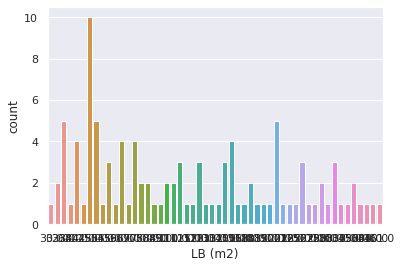

In [34]:
s = sns.countplot(x = "LB (m2)", data = df3)

Text(0.5, 1.0, '10 Top LT (m2)')

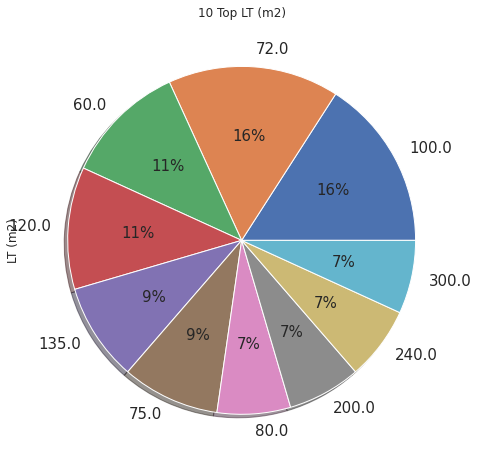

In [39]:
top_LT = df3.groupby(df3['LT (m2)'])['LT (m2)'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
top_LT.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("10 Top LT (m2)")

Text(0.5, 1.0, '10 Top LT (m2)')

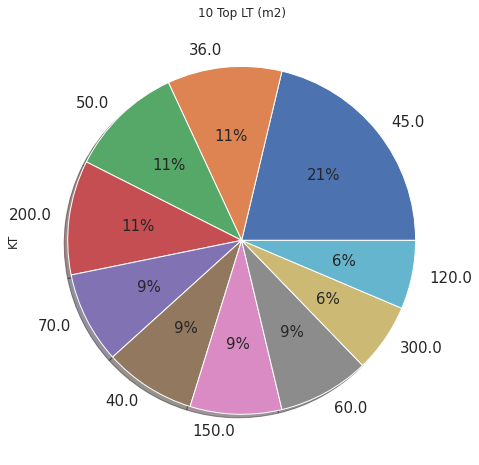

In [63]:
top_LT = df3.groupby(df3['LB (m2)'])['KT'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
top_LT.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("10 Top LT (m2)")

Text(0.5, 1.0, '10 Top LT (m2)')

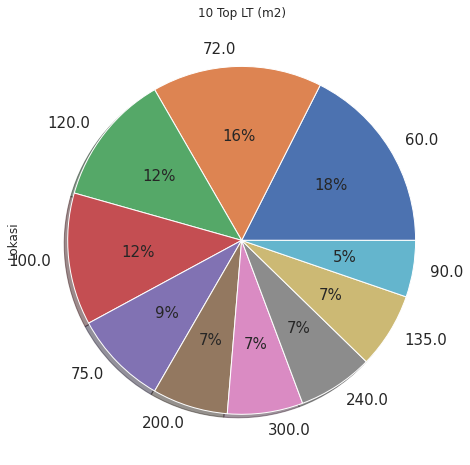

In [69]:
top_1 = df2.groupby(df2['LT (m2)'])['Lokasi'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
top_1.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("10 Top LT (m2)")

In [41]:
CS = pd.crosstab(index = df3["LT (m2)"], columns = df3["KT"])
CS

KT,1.0,2.0,3.0,4.0,5.0,6.0,7.0
LT (m2),,,,,,,
50.0,0,3,0,0,0,0,0
54.0,0,1,0,0,0,0,0
57.0,0,1,0,0,0,0,0
60.0,0,5,0,0,0,0,0
62.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
312.0,0,0,0,1,0,0,0
315.0,0,0,0,1,0,0,0
320.0,0,0,1,0,0,0,0


In [57]:
# Koefisien Korelasi
x = df3['LT (m2)']
y = df3['Harga']
pearsonr(x,y)

(0.5743956901490851, 1.487291427137096e-10)

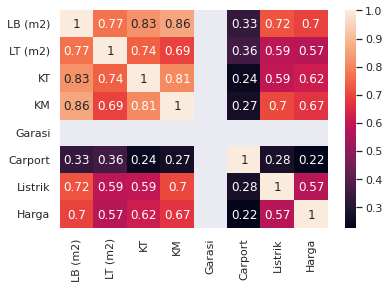

In [53]:
sns.heatmap(df3.corr(),annot=True)

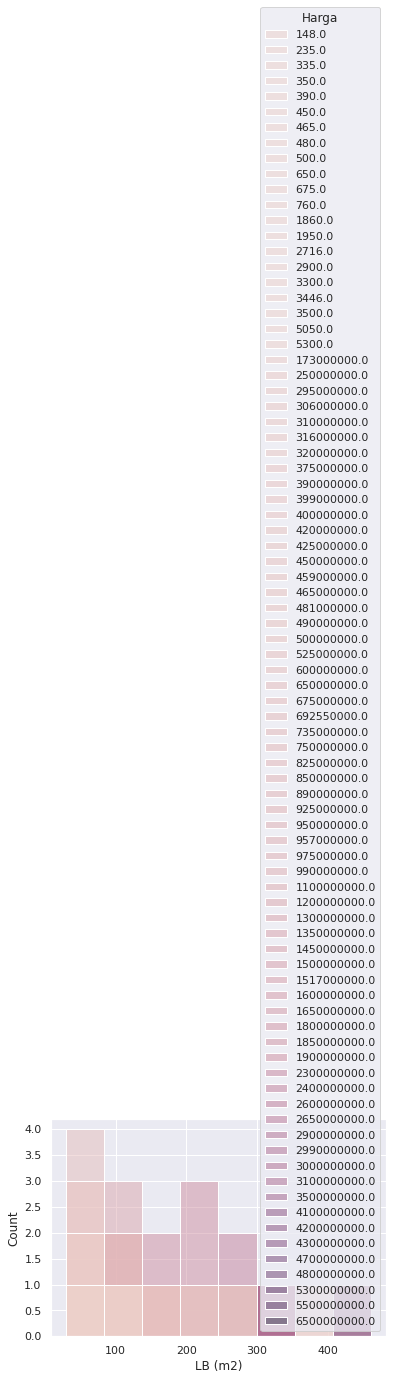

In [26]:
sns.histplot(data=df3,x='LB (m2)',hue='Harga')

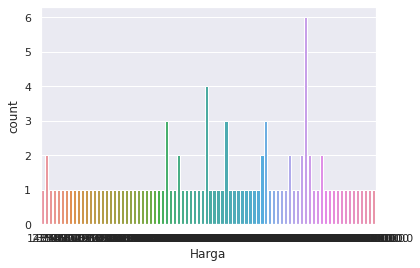

In [27]:
sns.countplot(df3.Harga)

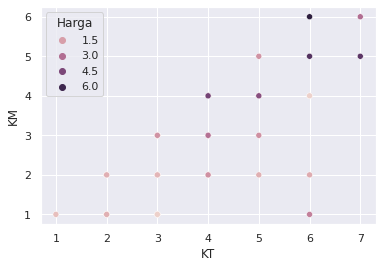

In [30]:
sns.scatterplot(x=df3.KT,y=df3.KM,hue=df3.Harga)

In [31]:
df3.corr()

,LB (m2),LT (m2),KT,KM,Garasi,Carport,Listrik,Harga
LB (m2),1.000000,0.770879,0.825131,0.861690,NaN,0.331907,0.721853,0.695291
LT (m2),0.770879,1.000000,0.741122,0.694236,NaN,0.360572,0.585042,0.574396
KT,0.825131,0.741122,1.000000,0.810647,NaN,0.243872,0.593908,0.615776
KM,0.861690,0.694236,0.810647,1.000000,NaN,0.267476,0.704387,0.668650
Garasi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carport,0.331907,0.360572,0.243872,0.267476,NaN,1.000000,0.277640,0.224867
Listrik,0.721853,0.585042,0.593908,0.704387,NaN,0.277640,1.000000,0.573548
Harga,0.695291,0.574396,0.615776,0.668650,NaN,0.224867,0.573548,1.000000


In [54]:
df2.corr()

,LT (m2),LB (m2),KT,KM,Garasi,Carport,Listrik,Harga
LT (m2),1.000000,0.793428,0.604750,0.574138,0.518199,0.705001,0.377738,0.412657
LB (m2),0.793428,1.000000,0.675506,0.668034,0.411511,0.501865,0.659425,0.604465
KT,0.604750,0.675506,1.000000,0.857698,0.402245,0.421727,0.312070,0.260321
KM,0.574138,0.668034,0.857698,1.000000,0.444125,0.468846,0.409888,0.353968
Garasi,0.518199,0.411511,0.402245,0.444125,1.000000,0.594386,0.287041,0.198000
Carport,0.705001,0.501865,0.421727,0.468846,0.594386,1.000000,0.185891,0.306716
Listrik,0.377738,0.659425,0.312070,0.409888,0.287041,0.185891,1.000000,0.640219
Harga,0.412657,0.604465,0.260321,0.353968,0.198000,0.306716,0.640219,1.000000


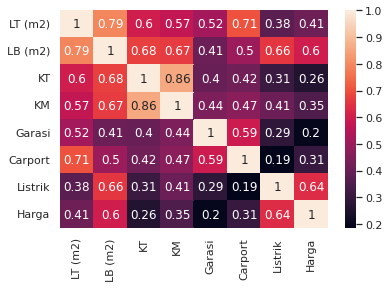

In [32]:
sns.heatmap(df2.corr(),annot=True)